In [14]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.typing import NDArray

In [15]:
def plot_matrix(mat: NDArray, title: str):
    plt.figure(figsize=(4, 4))
    plt.matshow(mat, fignum=1)
    plt.title(title)
    for (i, j), val in np.ndenumerate(mat):
        plt.text(j, i, f"{val:0.1f}", ha="center", va="center")
    plt.colorbar()
    plt.show()

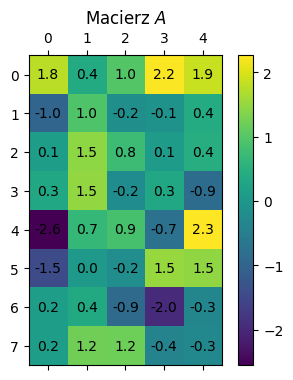

In [16]:
# Krok 0: Tworzymy losową macierz prostokątną A
np.random.seed(0)
n, m = 8, 5
A = np.random.randn(n, m)

# Krok 1: Rysujemy macierz A
plot_matrix(A, r"Macierz $A$")

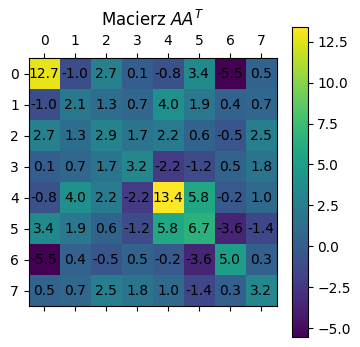

In [17]:
# Krok 2: Obliczamy AAT i rysujemy
AAT = A @ A.T
plot_matrix(AAT, r"Macierz $A A^T$")

In [18]:
# Krok 3: Wartości i wektory własne AAT
eigvals_U, U1 = np.linalg.eigh(AAT)
# Sortujemy malejąco
idx = np.argsort(eigvals_U)[::-1]
eigvals_U = eigvals_U[idx]
U1 = U1[:, idx]

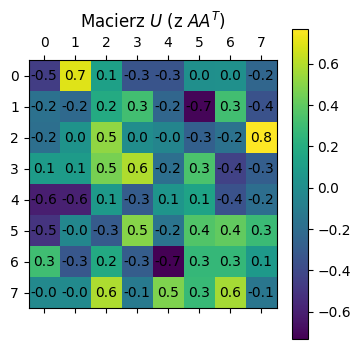

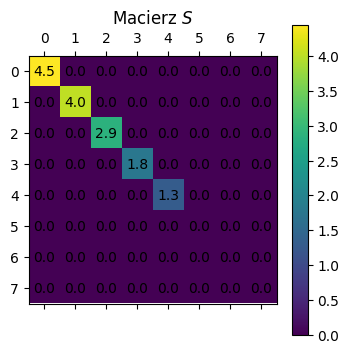

In [19]:
# Krok 4: Rysujemy macierz U i diagonalną S (Sii = sqrt(λi))
S1 = np.diag([np.sqrt(λ) if λ > 1e-10 else 0.0 for λ in eigvals_U])
plot_matrix(U1, r"Macierz $U$ (z $AA^T$)")
plot_matrix(S1, r"Macierz $S$")

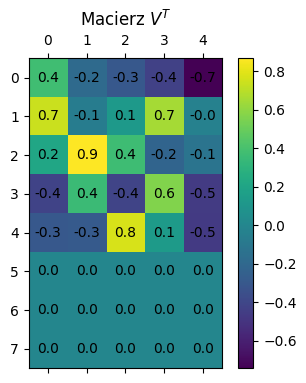

In [20]:
# Krok 5: Obliczamy V = A^T U S^-1
S1_inv = np.diag([1 / s if s > 1e-10 else 0.0 for s in np.diag(S1)])
V1 = A.T @ U1 @ S1_inv

# Krok 6: Rysujemy V^T
plot_matrix(V1.T, r"Macierz $V^T$")

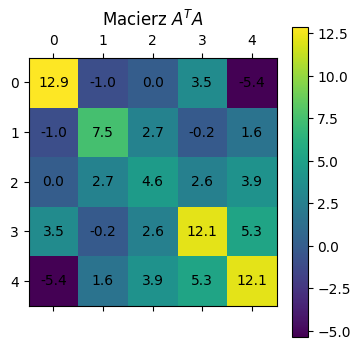

In [21]:
# Krok 7: Obliczamy ATA i rysujemy
ATA = A.T @ A
plot_matrix(ATA, r"Macierz $A^TA$")

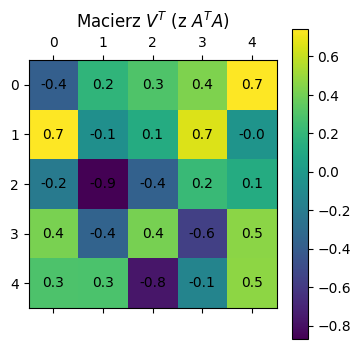

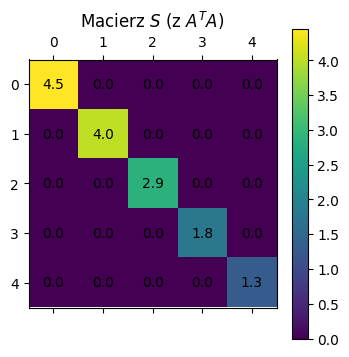

In [22]:
# Krok 8: Wartości i wektory własne ATA
eigvals_V, V2 = np.linalg.eigh(ATA)
idx = np.argsort(eigvals_V)[::-1]
eigvals_V = eigvals_V[idx]
V2 = V2[:, idx]

# Krok 9: Rysujemy macierz V^T i macierz S
S2 = np.diag([np.sqrt(λ) if λ > 1e-10 else 0.0 for λ in eigvals_V])
plot_matrix(V2.T, r"Macierz $V^T$ (z $A^TA$)")
plot_matrix(S2, r"Macierz $S$ (z $A^TA$)")

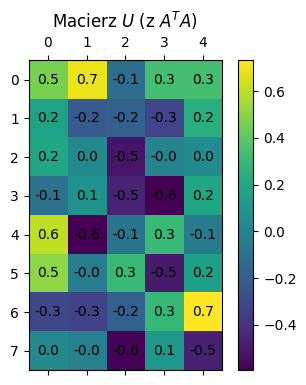

In [23]:
# Krok 10: Obliczamy U = A V S^-1
S2_inv = np.diag([1 / s if s > 1e-10 else 0 for s in np.diag(S2)])
U2 = A @ V2 @ S2_inv

# Krok 11: Rysujemy U
plot_matrix(U2, r"Macierz $U$ (z $A^TA$)")

In [24]:
# Krok 12: Porównanie obu dekompozycji
print("Czy A i dekompozycja SVD są równe (w przybliżeniu)?", np.allclose(A, U1 @ S1 @ V1.T))
print("Czy A i dekompozycja SVD są równe (w przybliżeniu)?", np.allclose(A, U2 @ S2 @ V2.T))
print("Czy macierze V są równe co do znaku (w przybliżeniu)?", np.allclose(np.abs(V1[:m, :m]), np.abs(V2)))
print("Czy macierze U są równe co do znaku (w przybliżeniu)?", np.allclose(np.abs(U2), np.abs(U1[:, :m])))

Czy A i dekompozycja SVD są równe (w przybliżeniu)? True
Czy A i dekompozycja SVD są równe (w przybliżeniu)? True
Czy macierze V są równe co do znaku (w przybliżeniu)? True
Czy macierze U są równe co do znaku (w przybliżeniu)? True


In [25]:
# Krok 13: Obliczamy dim R(A) i dim N(A)
rank_A = np.linalg.matrix_rank(A)
null_dim = m - rank_A
print(f"dim R(A) = {rank_A}, dim N(A) = {null_dim}")

dim R(A) = 5, dim N(A) = 0
